# INF3591 - Cloud Computing :: Taller Nº 1 - _Tester_
### Profesores: Cristian Ruz, Germán Contreras Sagredo
### Ayudante: Juan Pablo Gastovic


## _Testing_

El siguiente Google Colab tiene por objetivo corroborar que su instancia de Amazon RDS es, efectivamente, públicamente accesible.

En primer lugar, ejecute la celda a continuación para poder instalar las librerías necesarias para realizar el _testing_.

In [ ]:
!pip install PyMySQL

Luego, en esta celda complete las variables vacías (dentro de las comillas, sin comillas para el puerto) con los atributos de conectividad de su instancia en RDS.

In [ ]:
# Punto de enlace de la instancia de base de datos.
DATABASE_HOST = ''
# Nombre de la base de datos (NO CONFUNDIR CON EL ID DE LA INSTANCIA).
DATABASE_NAME = ''
# Puerto de la base de datos (por defecto 3306 para motor MySQL).
DATABASE_PORT = 3306
# Nombre de usuario maestro (por defecto "admin" para motor MySQL).
DATABASE_USERNAME = 'admin'
# Contraseña de usuario maestro.
DATABASE_PASSWORD = ''

Luego, ejecutaremos la conexión a la base de datos.

In [ ]:
import pymysql

In [ ]:
db = pymysql.connect(
    host=DATABASE_HOST,
    database=DATABASE_NAME,
    port=DATABASE_PORT,
    user=DATABASE_USERNAME,
    password=DATABASE_PASSWORD
)

Si la celda anterior se ejecuta sin errores, entonces puede asumir que su instancia en RDS se configuró correctamente. Haremos, no obstante, algunas pruebas de concepto. En primer lugar, crearemos un "cursor", esto es, un puntero a la base de datos, el que nos permitirá ejecutar consultas a esta.

In [ ]:
cursor = db.cursor()

Luego, haremos una consulta que nos entregará la versión de MySQL. Este debería coincidir con el escogido en la configuración de su instancia RDS (8.0.28 la más actual de MySQL).

In [ ]:
cursor.execute('SELECT version()')
version = cursor.fetchone()
print(f'Versión de MySQL: {version[0]}')

Por último, crearemos una tabla de ejemplo, la poblaremos y la consultaremos.

In [ ]:
create_user_sql = '''
  CREATE TABLE user (
    id SERIAL PRIMARY KEY,
    username VARCHAR(256),
    role VARCHAR(32)
  );
'''
insert_users_sql = '''
  INSERT INTO user (username, role) VALUES
    ('cruz', 'Docente'),
    ('glcontreras', 'Docente'),
    ('jpgastovic', 'Ayudante');
'''
cursor.execute(create_user_sql)
cursor.execute(insert_users_sql)
# Con este comando, guardamos los cambios.
cursor.connection.commit()

In [ ]:
fetch_users_sql = 'SELECT id, username, role FROM user;'
cursor.execute(fetch_users_sql)
users = cursor.fetchall()
for user in users:
  print(f'ID: {user[0]}\nNombre de usuario: {user[1]}\nRol: {user[2]}')
  print('-'*20)

Finalmente, eliminamos la tabla para mantener la base de datos limpia.

In [ ]:
drop_user_table_sql = 'DROP TABLE user;'
cursor.execute(drop_user_table_sql)
cursor.connection.commit()

## Errores recurrentes

### Creación de instancia sin indicar nombre de la base de datos.

Si al momento de crear una nueva instancia de la base de datos, **no indica un nombre para la base en sí**, se creará la instancia pero sin una base de datos por defecto. Esto se realiza en esta sección de la configuración al momento de crear una instancia.

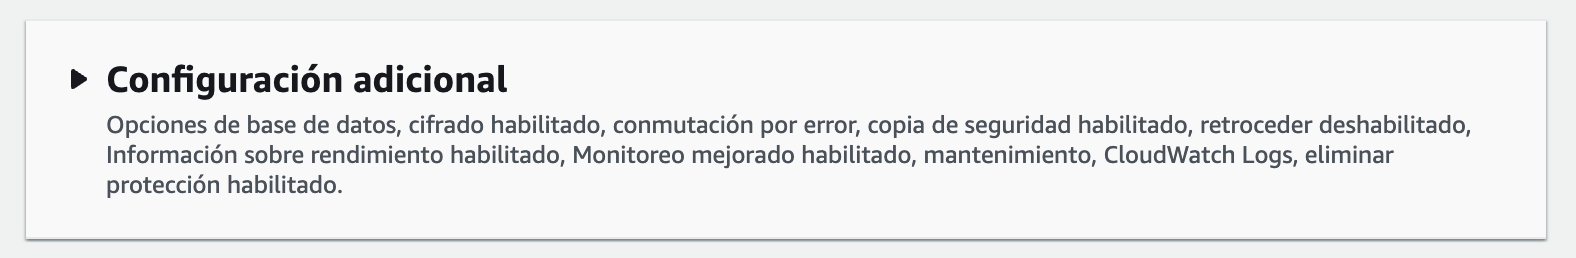
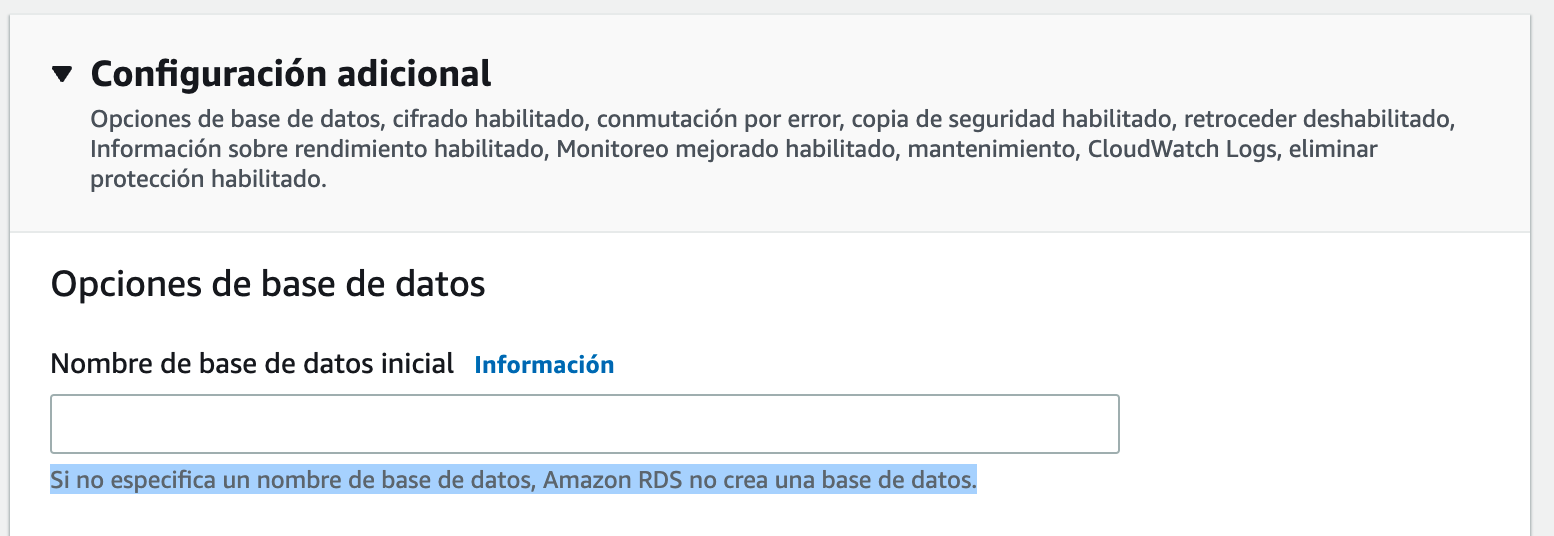

Esto responde a un cambio que realizó Amazon en el flujo de RDS hace algunos años. [Más información en el siguiente vínculo.](https://help.acloud.guru/hc/en-us/articles/360001061196-AWS-RDS-does-not-create-initial-database) Recuerde que **una instancia de base de datos en RDS no es una base de datos _per se_, sino que un servidor que posee un conjunto de estas.**

Lamentablemente, esto no se puede modificar desde la consola. Por lo tanto, tiene dos alternativas para resolverlo:

1. Crear una nueva instancia, asegurándose de indicar el nombre de la base de datos inicial.

2. Conectarse a la instancia y crear en el servidor de esta una base de datos.

A continuación, mostraremos cómo resolverlo con la segunda alternativa.

Si realizamos la conexión sin indicar una base de datos, o bien con un nombre vacío (_i.e._ `database=DATABASE_NAME`), entonces nos conectaremos al **servidor MySQL** directamente.

In [ ]:
db = pymysql.connect(
    host=DATABASE_HOST,
    port=DATABASE_PORT,
    user=DATABASE_USERNAME,
    password=DATABASE_PASSWORD
)

Una vez en el servidor, podemos crear una base de datos directamente con SQL.

In [ ]:
cursor = db.cursor()
cursor.execute('CREATE DATABASE ejemplo;')

Ahora, podemos probar nuevamente la conexión anterior con el nombre de base de datos que hayamos utilizado... o bien con el siguiente comando SQL.

In [ ]:
cursor.execute('USE ejemplo;')

Si lo anterior no arroja ningún error de excepción, puede volver a ejecutar las celdas de creación de usuario y ver el resultado.

### Uso de nombre de instancia de la base de datos en vez de la base de datos por defecto.

Un error recurrente en este _tester_ ha sido el mal uso del nombre de la base de datos. El nombre del identificador de base de datos de RDS **no es el que se debe utilizar para la conexión**.

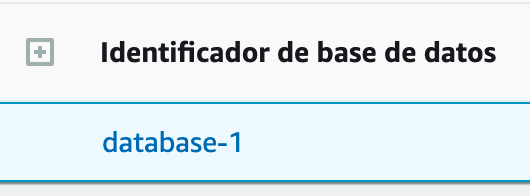

El anterior no es el que se busca. El necesario es el de la base de datos por defecto que se puede encontrar en la pestaña "Configuración" de su instancia.

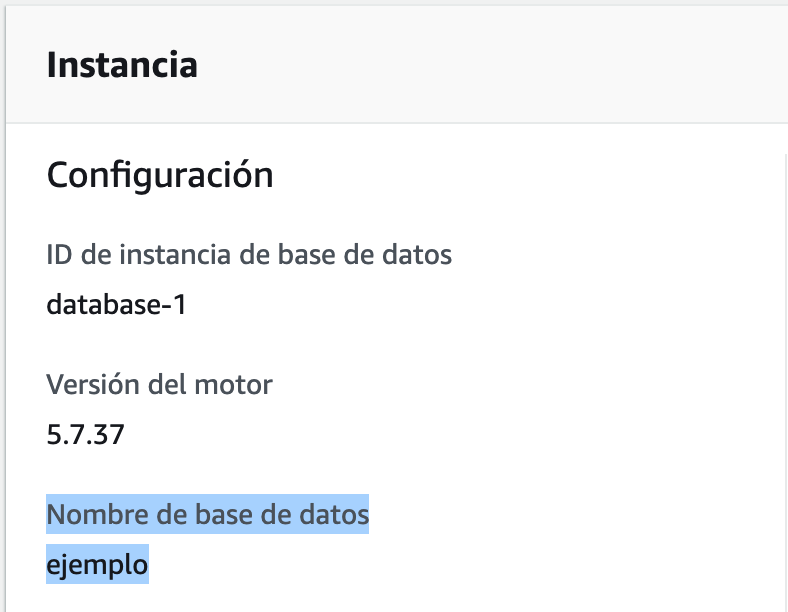

Si el nombre de la base de datos figura como `-`, entonces incurrió en el error de no poner un nombre por defecto, por lo que debe seguir los pasos de la sección anterior.

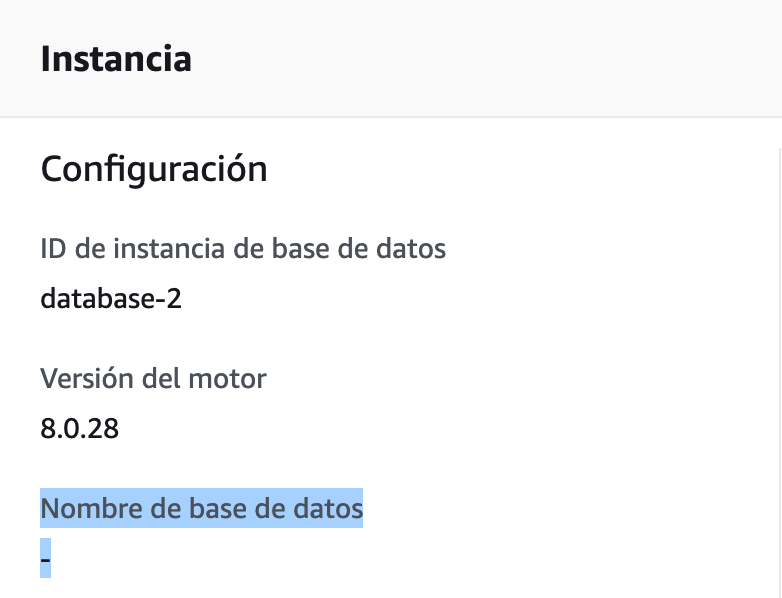